In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from tabulate import tabulate

In [187]:
seed = 240101025
np.random.seed(seed)
random.seed(seed)

num_datasets = 3
degrees = range(1, 10)

In [188]:
def generate_dataset(n_samples, mu, sigma):
    x_train = np.random.rand(n_samples)
    x_test = np.random.rand(n_samples)

    noise_train = np.random.normal(mu, sigma, n_samples)
    noise_test = np.random.normal(mu, sigma, n_samples)

    y_train = np.sin(1 + x_train**2) + noise_train
    y_test = np.sin(1 + x_test**2) + noise_test
    
    train_set = np.column_stack((x_train, y_train))
    test_set = np.column_stack((x_test, y_test))

    return train_set, test_set

In [189]:
def train_polynomial_models(train_set, test_set, degrees):
    x_train = train_set[:, 0].reshape(-1, 1)
    y_train = train_set[:, 1]
    x_test = test_set[:, 0].reshape(-1, 1)
    y_test = test_set[:, 1]

    models = []
    E_in = []
    E_out = []

    for degree in degrees:
        model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        model.fit(x_train, y_train)
        models.append(model)

        y_train_pred = model.predict(x_train)
        y_test_pred = model.predict(x_test)

        e_in = mean_squared_error(y_train, y_train_pred)
        e_out = mean_squared_error(y_test, y_test_pred)

        E_in.append(e_in)
        E_out.append(e_out)

    return models, E_in, E_out

1. Tạo 03 bộ dữ liệu D1, D2, D3. Mỗi bộ dữ liệu có 1 tập train gồm 10 điểm dữ liệu và 1 tập test gồm 10 điểm dữ liệu. Các điểm dữ liệu (x,y) có giá trị input x được phát sinh ngẫu nhiên trong khoảng [0,1], và giá trị target y = f(x)=sin(1+x^2)+ε với ε tuân theo phân phối chuẩn N(0,σ=0.03) như trong trang 58 của slides. Lưu ý σ=0.03 là độ lệch chuẩn (standard deviation).

In [190]:
all_models_10 = []
all_E_in_10 = []
all_E_out_10 = []
all_train_sets_10 = [] 
all_test_sets_10 = []

for _ in range(num_datasets):
    train_set, test_set = generate_dataset(10, 0, 0.03)
    models, E_in, E_out = train_polynomial_models(train_set, test_set, degrees)
    all_models_10.append(models)
    all_E_in_10.append(E_in)
    all_E_out_10.append(E_out)
    all_train_sets_10.append(train_set)
    all_test_sets_10.append(test_set)

2. Với mỗi bộ dữ liệu, ta sử dụng tập train để huấn luyện 9 mô hình polynomial regression có bậc (degree) từ 1-9 như trong trang 65 của slides. Sau đó, hãy tính E_in (trên tập train) và E_out (trên tập test) cho từng mô hình đã huấn luyện được, và tạo bảng kết quả như trong trang 66 của slides.

In [191]:
for dataset_index in range(num_datasets):
    table_data = []
    for degree, e_in, e_out in zip(
        degrees, all_E_in_10[dataset_index], all_E_out_10[dataset_index]
    ):
        table_data.append([degree, f"{e_in:.10f}", f"{e_out:.10f}"])

    headers = ["Degree", f"E_in_D{dataset_index+1}", f"E_out_D{dataset_index+1}"]
    table = tabulate(
        table_data, headers, tablefmt="grid", colalign=("center", "center", "center")
    )
    print(f"Dataset D{dataset_index + 1}'")
    print(table)
    print("\n")

Dataset D1'
+----------+-------------+------------+
|  Degree  |   E_in_D1   |  E_out_D1  |
+==========+=============+============+
|    1     | 0.000781974 | 0.0034366  |
+----------+-------------+------------+
|    2     | 0.000291909 | 0.00200565 |
+----------+-------------+------------+
|    3     | 0.000290111 | 0.00182392 |
+----------+-------------+------------+
|    4     | 0.000288274 | 0.00169599 |
+----------+-------------+------------+
|    5     |  0.0002077  | 0.0258563  |
+----------+-------------+------------+
|    6     | 0.00014041  |  0.177706  |
+----------+-------------+------------+
|    7     | 0.000137707 |  0.256069  |
+----------+-------------+------------+
|    8     | 2.48048e-05 |  1699.15   |
+----------+-------------+------------+
|    9     |      0      |   540895   |
+----------+-------------+------------+


Dataset D2'
+----------+-------------+------------+
|  Degree  |   E_in_D2   |  E_out_D2  |
+==========+=============+============+
|    1     | 0

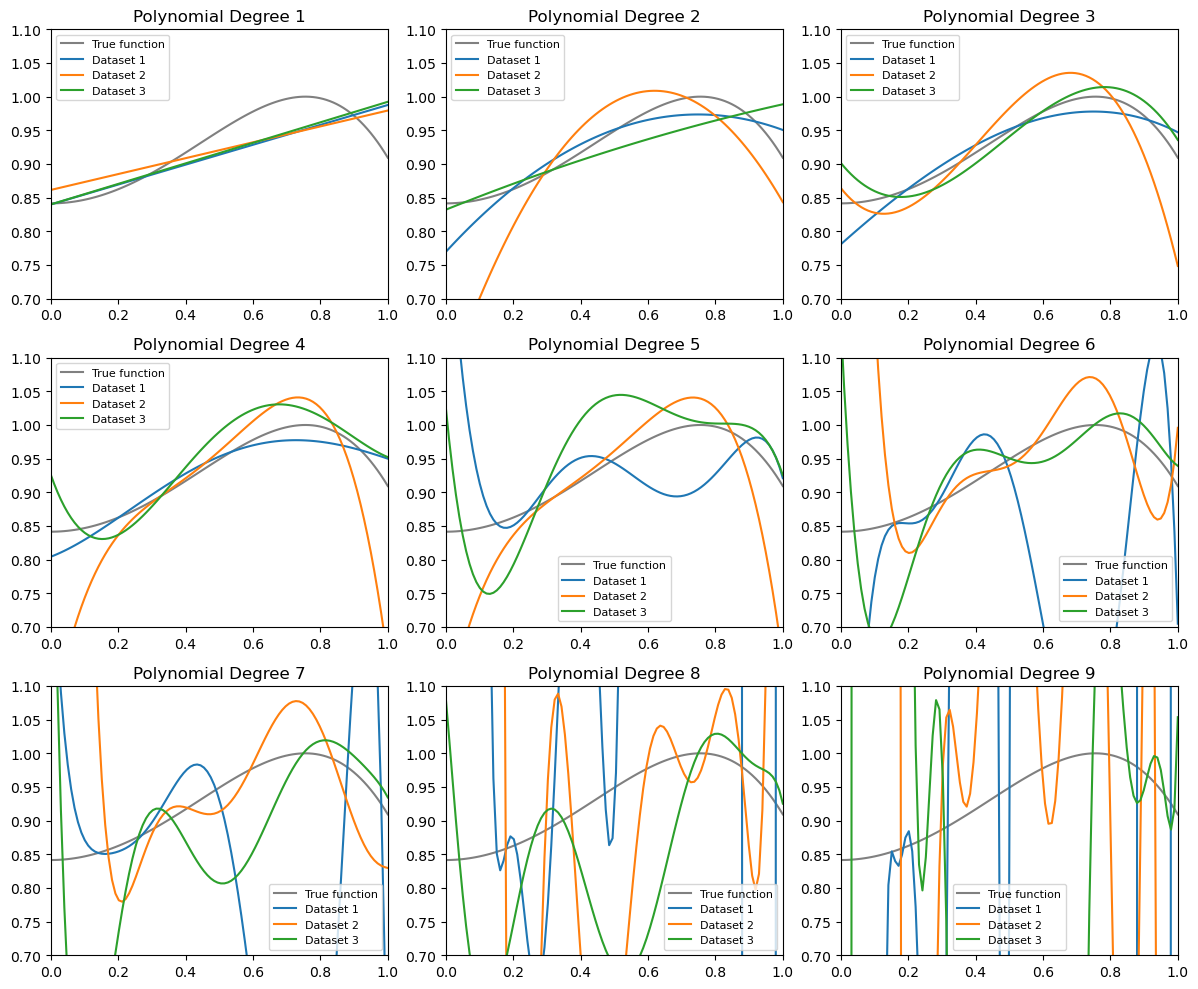

In [192]:
fig, axes = plt.subplots(3, 3, figsize=(12, 10)) 
axes = axes.flatten()

x_plot = np.linspace(0, 1, 100).reshape(-1, 1)
y_true = np.sin(1 + x_plot**2)

for i, degree in enumerate(degrees): 
    ax = axes[i]
    ax.plot(x_plot, y_true, color="gray", linestyle="solid", label="True function")
    
    for j in range(num_datasets):
        model = all_models_10[j][i] 
        y_pred = model.predict(x_plot)
        ax.plot(x_plot, y_pred, label=f"Dataset {j+1}", linestyle="solid")
        # ax.scatter(degree, all_E_out_10[j][i], marker="+", s=100, label=f"E_out {j+1}")

    ax.set_title(f"Polynomial Degree {degree}")
    ax.set_xlim(0, 1)
    ax.set_ylim(0.7, 1.1)
    ax.legend(fontsize=8)

plt.tight_layout()
plt.show()


4. Các bạn có nhận xét thế nào về bias và variance của các mô hình?

In [193]:
E_out = np.array(all_E_out_10) 

bias = np.mean(E_out, axis=0) 
variance = np.var(E_out, axis=0) 

for degree, b, v in zip(degrees, bias, variance):
    print(f"Degree {degree}: Bias = {b:.6f}, Variance = {v:.6f}")

Degree 1: Bias = 0.002500, Variance = 0.000001
Degree 2: Bias = 0.001973, Variance = 0.000000
Degree 3: Bias = 0.001529, Variance = 0.000000
Degree 4: Bias = 0.001673, Variance = 0.000000
Degree 5: Bias = 0.010391, Variance = 0.000121
Degree 6: Bias = 0.060459, Variance = 0.006873
Degree 7: Bias = 0.089277, Variance = 0.013920
Degree 8: Bias = 566.470987, Variance = 641483.238580
Degree 9: Bias = 180319.335886, Variance = 65007520463.107971


- Bậc thấp (1-4): Underfitting, bias cao, variance thấp.
- Bậc trung bình (5-7): Có thể tối ưu nhất vì bias giảm và variance chưa quá cao.
- Bậc cao (8-9): Overfitting, bias rất cao, variance cực lớn, không thể sử dụng.

5. 03 bộ dữ liệu trên tập train chỉ có kích thước là 10. Chúng ta hãy thử kích thước tập train và test (100, 1000 điểm dữ liệu), và lặp lại các thực nghiệm từ 1-4 như trên. 

# 100 điểm dữ liệu

In [194]:
all_models_100 = []
all_E_in_100 = []
all_E_out_100 = []
all_train_sets_100 = [] 
all_test_sets_100 = []

for _ in range(num_datasets):
    train_set, test_set = generate_dataset(100, 0, 0.03)
    models, E_in, E_out = train_polynomial_models(train_set, test_set, degrees)
    all_models_100.append(models)
    all_E_in_100.append(E_in)
    all_E_out_100.append(E_out)
    all_train_sets_100.append(train_set)
    all_test_sets_100.append(test_set)

In [195]:
for dataset_index in range(num_datasets):
    table_data = []
    for degree, e_in, e_out in zip(
        degrees, all_E_in_100[dataset_index], all_E_out_100[dataset_index]
    ):
        table_data.append([degree, f"{e_in:.10f}", f"{e_out:.10f}"])

    headers = ["Degree", f"E_in_D{dataset_index+1}", f"E_out_D{dataset_index+1}"]
    table = tabulate(
        table_data, headers, tablefmt="grid", colalign=("center", "center", "center")
    )
    print(f"Dataset D{dataset_index + 1}'")
    print(table)
    print("\n")

Dataset D1'
+----------+-------------+-------------+
|  Degree  |   E_in_D1   |  E_out_D1   |
+==========+=============+=============+
|    1     | 0.00124029  | 0.00148567  |
+----------+-------------+-------------+
|    2     | 0.00104968  | 0.00119477  |
+----------+-------------+-------------+
|    3     | 0.000814693 | 0.000753324 |
+----------+-------------+-------------+
|    4     | 0.00078009  | 0.000815133 |
+----------+-------------+-------------+
|    5     | 0.000771482 | 0.000786756 |
+----------+-------------+-------------+
|    6     | 0.000741657 | 0.00101932  |
+----------+-------------+-------------+
|    7     | 0.000730712 | 0.00134447  |
+----------+-------------+-------------+
|    8     | 0.000722391 | 0.00190357  |
+----------+-------------+-------------+
|    9     | 0.000673688 | 0.000991223 |
+----------+-------------+-------------+


Dataset D2'
+----------+-------------+------------+
|  Degree  |   E_in_D2   |  E_out_D2  |
+==========+=============+=======

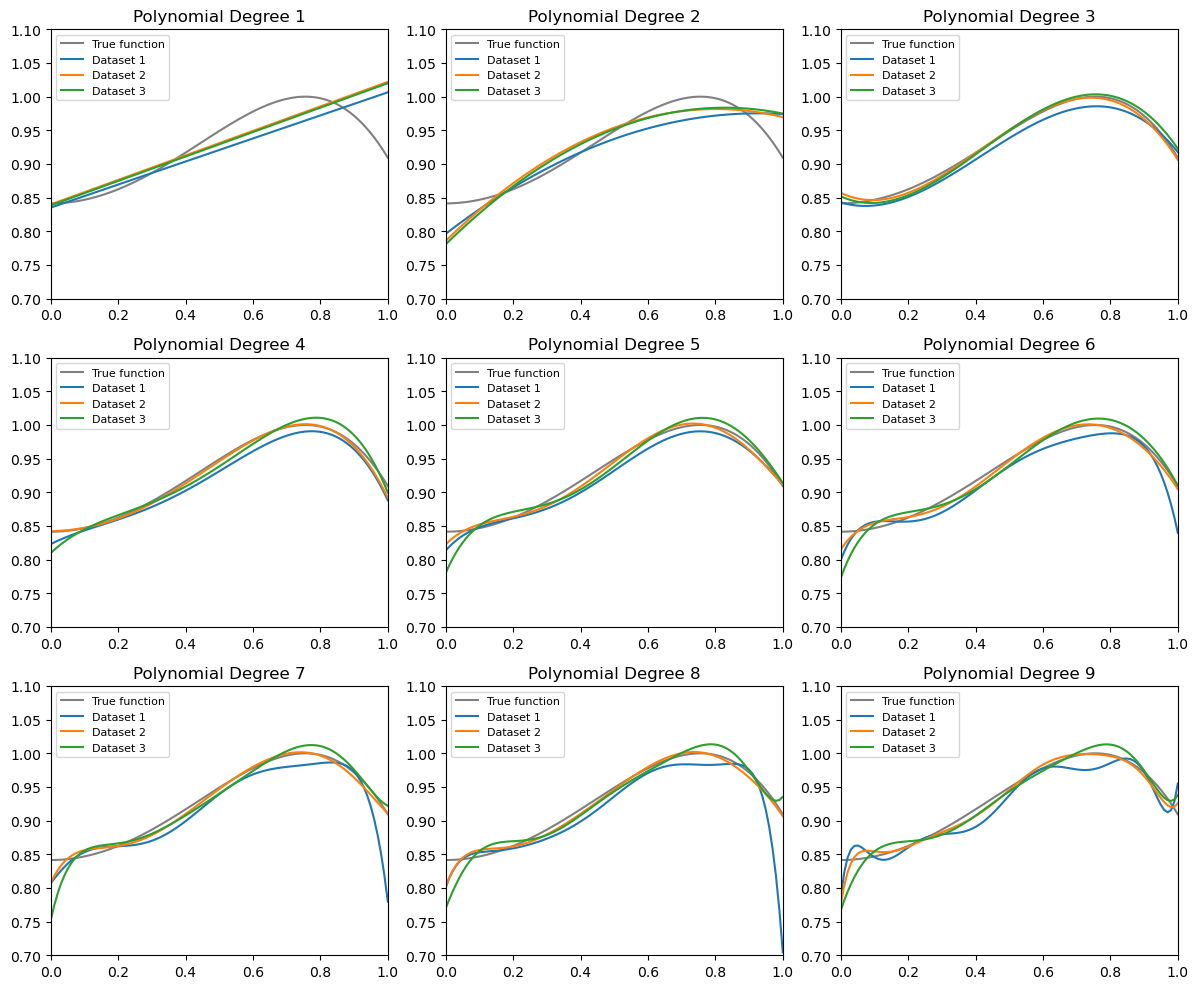

In [196]:
fig, axes = plt.subplots(3, 3, figsize=(12, 10)) 
axes = axes.flatten()

x_plot = np.linspace(0, 1, 100).reshape(-1, 1)
y_true = np.sin(1 + x_plot**2)

for i, degree in enumerate(degrees): 
    ax = axes[i]
    ax.plot(x_plot, y_true, color="gray", linestyle="solid", label="True function")
    
    for j in range(num_datasets):
        model = all_models_100[j][i] 
        y_pred = model.predict(x_plot)
        ax.plot(x_plot, y_pred, label=f"Dataset {j+1}", linestyle="solid")

    ax.set_title(f"Polynomial Degree {degree}")
    ax.set_xlim(0, 1)
    ax.set_ylim(0.7, 1.1)
    ax.legend(fontsize=8)

plt.tight_layout()
plt.show()

Nhận xét Bias và variance sau khi tăng kích thước tập dữ liệu

In [197]:
E_out = np.array(all_E_out_100) 

bias = np.mean(E_out, axis=0) 
variance = np.var(E_out, axis=0) 

for degree, b, v in zip(degrees, bias, variance):
    print(f"Degree {degree}: Bias = {b:.6f}, Variance = {v:.6f}")

Degree 1: Bias = 0.001908, Variance = 0.000000
Degree 2: Bias = 0.001451, Variance = 0.000000
Degree 3: Bias = 0.001065, Variance = 0.000000
Degree 4: Bias = 0.001074, Variance = 0.000000
Degree 5: Bias = 0.001089, Variance = 0.000000
Degree 6: Bias = 0.001177, Variance = 0.000000
Degree 7: Bias = 0.001304, Variance = 0.000000
Degree 8: Bias = 0.001475, Variance = 0.000000
Degree 9: Bias = 0.001178, Variance = 0.000000


- Tăng số lượng điểm dữ liệu giúp giảm variance mạnh mẽ, đặc biệt ở các mô hình bậc cao, giúp kiểm soát overfitting
- Bias không giảm nhiều
- Mô hình bậc 3-5 vẫn ổn định

# 1000 điểm dữ liệu

In [198]:
all_models_1000 = []
all_E_in_1000 = []
all_E_out_1000 = []
all_train_sets_1000 = [] 
all_test_sets_1000 = []

for _ in range(num_datasets):
    train_set, test_set = generate_dataset(100, 0, 0.03)
    models, E_in, E_out = train_polynomial_models(train_set, test_set, degrees)
    all_models_1000.append(models)
    all_E_in_1000.append(E_in)
    all_E_out_1000.append(E_out)
    all_train_sets_1000.append(train_set)
    all_test_sets_1000.append(test_set)

In [199]:
for dataset_index in range(num_datasets):
    table_data = []
    for degree, e_in, e_out in zip(
        degrees, all_E_in_1000[dataset_index], all_E_out_1000[dataset_index]
    ):
        table_data.append([degree, f"{e_in:.10f}", f"{e_out:.10f}"])

    headers = ["Degree", f"E_in_D{dataset_index+1}", f"E_out_D{dataset_index+1}"]
    table = tabulate(
        table_data, headers, tablefmt="grid", colalign=("center", "center", "center")
    )
    print(f"Dataset D{dataset_index + 1}'")
    print(table)
    print("\n")

Dataset D1'
+----------+-------------+-------------+
|  Degree  |   E_in_D1   |  E_out_D1   |
+==========+=============+=============+
|    1     | 0.00143973  | 0.00163034  |
+----------+-------------+-------------+
|    2     | 0.000949503 | 0.00112056  |
+----------+-------------+-------------+
|    3     | 0.000718663 | 0.000852362 |
+----------+-------------+-------------+
|    4     | 0.000718644 | 0.000851139 |
+----------+-------------+-------------+
|    5     | 0.000711457 | 0.000839842 |
+----------+-------------+-------------+
|    6     | 0.000711413 | 0.000839232 |
+----------+-------------+-------------+
|    7     | 0.000711045 | 0.000846716 |
+----------+-------------+-------------+
|    8     | 0.000710559 | 0.000845898 |
+----------+-------------+-------------+
|    9     | 0.000708711 | 0.000869362 |
+----------+-------------+-------------+


Dataset D2'
+----------+-------------+-------------+
|  Degree  |   E_in_D2   |  E_out_D2   |
+==========+=============+=====

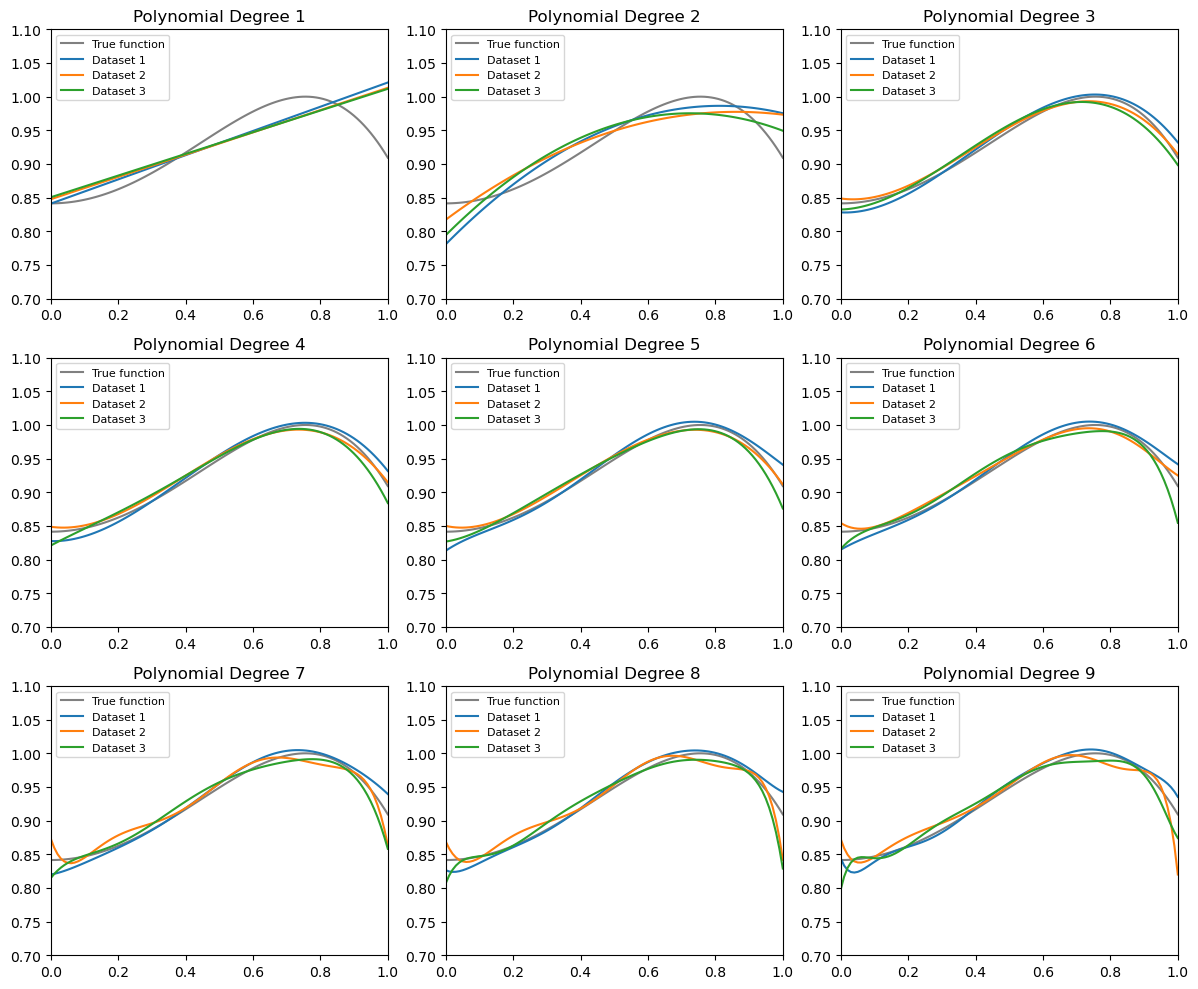

In [200]:
fig, axes = plt.subplots(3, 3, figsize=(12, 10)) 
axes = axes.flatten()

x_plot = np.linspace(0, 1, 100).reshape(-1, 1)
y_true = np.sin(1 + x_plot**2)

for i, degree in enumerate(degrees): 
    ax = axes[i]
    ax.plot(x_plot, y_true, color="gray", linestyle="solid", label="True function")
    
    for j in range(num_datasets):
        model = all_models_1000[j][i] 
        y_pred = model.predict(x_plot)
        ax.plot(x_plot, y_pred, label=f"Dataset {j+1}", linestyle="solid")

    ax.set_title(f"Polynomial Degree {degree}")
    ax.set_xlim(0, 1)
    ax.set_ylim(0.7, 1.1)
    ax.legend(fontsize=8)

plt.tight_layout()
plt.show()

In [201]:
E_out = np.array(all_E_out_1000) 

bias = np.mean(E_out, axis=0) 
variance = np.var(E_out, axis=0) 

for degree, b, v in zip(degrees, bias, variance):
    print(f"Degree {degree}: Bias = {b:.6f}, Variance = {v:.6f}")

Degree 1: Bias = 0.001729, Variance = 0.000000
Degree 2: Bias = 0.001224, Variance = 0.000000
Degree 3: Bias = 0.000884, Variance = 0.000000
Degree 4: Bias = 0.000896, Variance = 0.000000
Degree 5: Bias = 0.000897, Variance = 0.000000
Degree 6: Bias = 0.000909, Variance = 0.000000
Degree 7: Bias = 0.000943, Variance = 0.000000
Degree 8: Bias = 0.000985, Variance = 0.000000
Degree 9: Bias = 0.000973, Variance = 0.000000


- Bias có giảm nhưng không đáng kể khi tăng kích thước dữ liệu
- Variance giảm, làm mô hình ổn định hơn

6. Sử dụng kết quả thực nghiệm và trực quan hóa, để trả lời thêm 2 câu hỏi sau:
- Tăng kích thước tập train có thể giảm bias của mô hình hay không?
- Tăng kích thước tập train có thể giảm variance của mô hình hay không?

Trả lời: 
- Bias không giảm đáng kể khi tăng kích thước dữ liệu
- Variance giảm đáng kể
- Không có dấu hiệu overfitting như khi dữ liệu nhỏ
- Mô hình bậc 3-5 có thể vẫn là lựa chọn tối ưu